<a href="https://colab.research.google.com/github/astromad/GeekyMad/blob/main/LLM_Quantization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

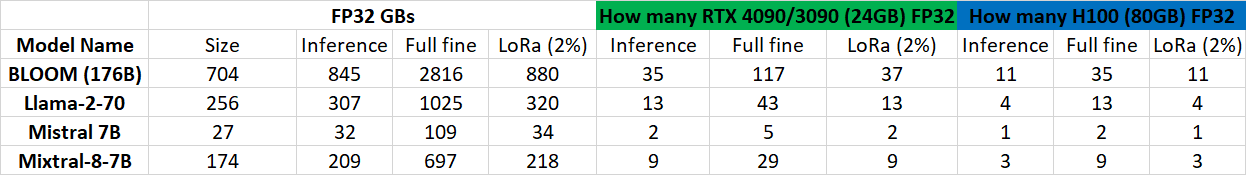

8-bit Matrix Multiplication for Transformers at Scale https://arxiv.org/abs/2208.07339

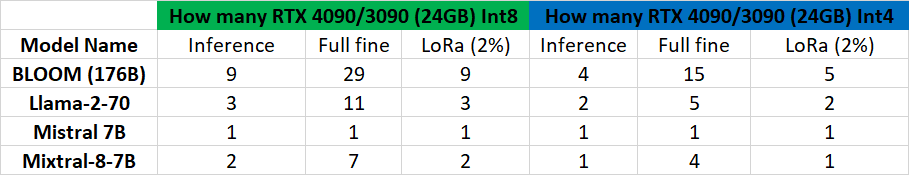

In [ ]:
!pip install transformers bitsandbytes accelerate

In [ ]:
import torch
print(torch.__version__)
print (torch.cuda.is_available())

In [ ]:
model_name = "mistralai/Mixtral-8x7B-Instruct-v0.1"

In [ ]:
from transformers import AutoModelForCausalLM, pipeline

model = AutoModelForCausalLM.from_pretrained(
          model_name, quantization_config=bnb_config, device_map={"": 0}
)

In [ ]:
model_8bit = AutoModelForSeq2SeqLM.from_pretrained(model_id, device_map="auto", load_in_8bit=True)

In [ ]:
model_8bit.get_memory_footprint()

In [ ]:
prompt="Summarize your thoughts on AI hallucinations"

In [ ]:
input_ids = tokenizer.encode(prompt, return_tensors='pt',padding=True).cuda()
output = model.generate(inputs=input_ids, pad_token_id=tokenizer.unk_token_id,do_sample=True,temperature=0.4, repetition_penalty=1.1, top_p=0.95, top_k=40, max_new_tokens=512).cuda()
print(tokenizer.decode(output[0]))